# 一、报表自动化案例

# 1.1 数据准备

1、获取数据源---导入数据和熟悉数据

In [6]:
import pandas as pd

In [7]:
data=pd.read_csv(r'/Users/Eric/Documents/2019/learning/1_python/对比Excel,轻松学习Python数据分析数据集/order-14.1.csv',
                 encoding="gbk",sep= ",")

In [8]:
data.head(3)  #查看各字段情况

,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID
0,30006206.0,915000003.0,CDNL,25.23,0.328,2018/1/1,20170103CDLG000210052759
1,30163281.0,914010000.0,CDNL,2.00,2.000,2018/1/2,20170103CDLG000210052759
2,30200518.0,922000000.0,CDNL,19.62,0.230,2018/1/3,20170103CDLG000210052759


In [9]:
data.shape  #获取数据集大小---3744行7列

(3744, 7)

In [10]:
data.info()   #查看各字段数据类型和空值情况，实际行列数---3478行7列

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 7 columns):
商品ID    3478 non-null float64
类别ID    3478 non-null float64
门店编号    3478 non-null object
单价      3478 non-null float64
销量      3478 non-null float64
成交时间    3478 non-null object
订单ID    3478 non-null object
dtypes: float64(4), object(3)
memory usage: 204.8+ KB


In [11]:
data.describe()

,商品ID,类别ID,单价,销量
count,3.478000e+03,3.478000e+03,3478.000000,3478.000000
mean,3.004899e+07,9.214786e+08,10.084914,1.154116
std,7.303804e+04,9.653496e+06,13.045840,1.924219
min,2.998902e+07,9.100000e+08,0.200000,-11.152000
25%,2.998915e+07,9.140701e+08,2.720000,0.747250
50%,3.001310e+07,9.220000e+08,5.600000,1.000000
75%,3.010167e+07,9.230000e+08,11.577500,1.029500
max,3.021483e+07,9.600000e+08,154.520000,45.000000


2、数据预处理---缺失值、重复值、异常值、数据类型转换、索引设置

1）缺失值处理---从data.info()信息中可以看到数据集中存在很多空白行

In [12]:
data_notnull=data.dropna(how='all')   #删除所有的空白行

2）重复值处理---确定重复值原则，全部列重复还是某几列重复

In [13]:
data_notnull.duplicated().sum()  #按全部列统计重复值

10

In [14]:
data_notnull.duplicated(subset=['成交时间','订单ID']).sum()  #按具体列统计重复值

195

本数据集是模拟数据，因此很多重复值，这里暂不做处理，但是在实际分析场景，应该用df_duplicate.drop_duplicates()按全部列删除重复值

3）异常值处理---通过data.describe()和绘制箱形图或直方图查看数据分布发现异常值

In [15]:
data_notnull['单价']

0       25.23
1        2.00
2       19.62
3        2.80
4       47.41
5        0.30
6       77.52
7       15.57
8       15.58
9        1.98
10      27.43
11       3.98
12      33.43
13       8.17
14       1.98
15      18.52
16      19.44
17       7.60
18      15.43
19      19.52
20       0.30
21      27.21
22       3.32
23       1.50
24       1.50
25       1.50
26       3.20
27       1.58
28       2.80
29      11.59
        ...  
3448    29.42
3449     4.12
3450    10.62
3451    14.52
3452     3.12
3453     3.12
3454     7.60
3455     3.20
3456     3.20
3457     6.80
3458     1.98
3459     1.98
3460    13.59
3461     2.50
3462    33.42
3463     1.98
3464     4.92
3465     1.98
3466     9.57
3467    15.62
3468    11.58
3469     9.52
3470     3.20
3471    17.62
3472    19.42
3473     6.58
3474    15.42
3475     9.62
3476    15.62
3477    23.21
Name: 单价, Length: 3478, dtype: float64

In [17]:
#导入库
import matplotlib as mpl
import matplotlib.pyplot as plt 
#让图表直接在Jupyter Notebook中展示出来
%matplotlib inline  
#解决windows电脑中文乱码问题
mpl.rcParams["font.sans-serif"] = ["SimHei"]
#解决mac电脑中文乱码问题
mpl.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
#解决负号无法正常显示的问题
mpl.rcParams["axes.unicode_minus"] = False
%config InlineBackend.figure_format='svg' #解决默认设置下matplotlib做出来的图表不清晰的问题，将图表设置成矢量图格式
plt.figure(figsize=(8,6)) #建立宽为8高为6的画布， figsize参数用来设置参数

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

No handles with labels found to put in legend.


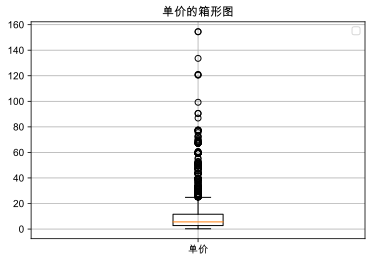

In [18]:
#绘制单价箱形图
#1-数值
x=data_notnull['单价']
labels=['单价']

#2-建立坐标系并绘图
plt.subplot(1,1,1)
plt.boxplot(x,labels=labels,vert=True)

#3-图表设置
plt.title("单价的箱形图",loc='center')   #设置标题
plt.grid(True)   #设置网格线
plt.legend()   #设置图例
#plt.xlabel('月份')   #设置x轴名称
#plt.ylabel('人数')   #设置y轴名称

No handles with labels found to put in legend.


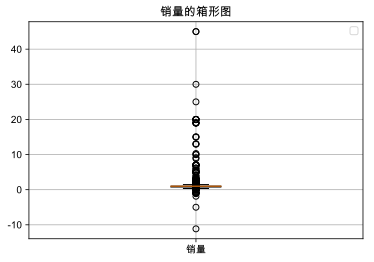

In [19]:
#绘制销量箱形图
#1-数值
x=data_notnull['销量']
labels=['销量']

#2-建立坐标系并绘图
plt.subplot(1,1,1)
plt.boxplot(x,labels=labels,vert=True)

#3-图表设置
plt.title("销量的箱形图",loc='center')   #设置标题
plt.grid(True)   #设置网格线
plt.legend()   #设置图例
#plt.xlabel('月份')   #设置x轴名称
#plt.ylabel('人数')   #设置y轴名称

本数据集是模拟数据，暂时先不做异常值处理，在实际业务中，要根据实际业务逻辑进行异常值处理，即进行数据筛选和数据替换

4）数据类型转换

In [20]:
#要按月统计，因此要将成交时间的类型变成日期型
data_notnull['成交时间']=data_notnull['成交时间'].astype('datetime64')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
data_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3478 entries, 0 to 3477
Data columns (total 7 columns):
商品ID    3478 non-null float64
类别ID    3478 non-null float64
门店编号    3478 non-null object
单价      3478 non-null float64
销量      3478 non-null float64
成交时间    3478 non-null datetime64[ns]
订单ID    3478 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 217.4+ KB


In [22]:
data_notnull.head(5)

,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID
0,30006206.0,915000003.0,CDNL,25.23,0.328,2018-01-01,20170103CDLG000210052759
1,30163281.0,914010000.0,CDNL,2.00,2.000,2018-01-02,20170103CDLG000210052759
2,30200518.0,922000000.0,CDNL,19.62,0.230,2018-01-03,20170103CDLG000210052759
3,29989105.0,922000000.0,CDNL,2.80,2.044,2018-01-04,20170103CDLG000210052759
4,30179558.0,915000100.0,CDNL,47.41,0.226,2018-01-05,20170103CDLG000210052759


也可以在导入数据时就定义各字段的数据类型哦，用的是pd.read_csv中的两个参数dtype：设置各字段格式，例子{‘a’: np.float64, ‘b’: np.int32, ‘c’: ‘Int64’} 
和parse_dates : 将某些列解析成日期格式

# 1.2 数据分析

1、计算本月相关指标

首先根据成交时间将本月的全部数据筛选出来，然后在此基础上进行计算。

In [38]:
from datetime import datetime
#数据选择---选择符合条件的所有行---df[(条件1)&(条件2)]
this_month_data=data_notnull[(data_notnull['成交时间']>=datetime(2018,2,1))& (data_notnull['成交时间'] < datetime(2018,3,1))]

In [45]:
#销售额计算---销售额=单价*销量；
this_month_sales=(this_month_data['单价']*this_month_data['销量']).sum()
#客流量计算---客流量=订单ID去重计数；
this_month_num=this_month_data['订单ID'].drop_duplicates().count()
#客单价计算---客单价=销售额/课流量
this_month_price=this_month_sales/this_month_num
#打印结果---浮点数设置输出 print('str1{}str2{:.nf}'.format('str11',数字))  .nf表示以浮点数显示，且显示到小数点后n位
print('本月销售额为：{:.2f}元,客流量为：{}人次,客单价为：{:.2f}元'.format(this_month_sales,this_month_num,this_month_price))

本月销售额为：10412.78元,客流量为：343人次,客单价为：30.36元


2、计算上月相关指标

In [46]:
#数据选择---选择符合条件的所有行---df[(条件1)&(条件2)]
last_month_data=data_notnull[(data_notnull['成交时间']>=datetime(2018,1,1))& (data_notnull['成交时间'] < datetime(2018,2,1))]
#销售额计算---销售额=单价*销量；
last_month_sales=(last_month_data['单价']*last_month_data['销量']).sum()
#客流量计算---客流量=订单ID去重计数；
last_month_num=last_month_data['订单ID'].drop_duplicates().count()
#客单价计算---客单价=销售额/课流量
last_month_price=last_month_sales/last_month_num
#打印结果---浮点数设置输出 print('str1{}str2{:.nf}'.format('str11',数字))  .nf表示以浮点数显示，且显示到小数点后n位
print('上月销售额为：{:.2f}元,客流量为：{}人次,客单价为：{:.2f}元'.format(last_month_sales,last_month_num,last_month_price))

上月销售额为：9940.97元,客流量为：315人次,客单价为：31.56元


3、计算去年同期相关指标

In [47]:
#数据选择---选择符合条件的所有行---df[(条件1)&(条件2)]
same_month_data=data_notnull[(data_notnull['成交时间']>=datetime(2017,2,1))& (data_notnull['成交时间'] < datetime(2017,3,1))]
#销售额计算---销售额=单价*销量；
same_month_sales=(same_month_data['单价']*same_month_data['销量']).sum()
#客流量计算---客流量=订单ID去重计数；
same_month_num=same_month_data['订单ID'].drop_duplicates().count()
#客单价计算---客单价=销售额/课流量
same_month_price=same_month_sales/same_month_num
#打印结果---浮点数设置输出 print('str1{}str2{:.nf}'.format('str11',数字))  .nf表示以浮点数显示，且显示到小数点后n位
print('去年同期销售额为：{:.2f}元,客流量为：{}人次,客单价为：{:.2f}元'.format(same_month_sales,same_month_num,same_month_price))

去年同期销售额为：8596.31元,客流量为：262人次,客单价为：32.81元


4、利用函数提高编码效率

是的，以上3个指标的计算逻辑是一样的，不同的是数据源不同，我们可以利用函数来提高编码效率

In [48]:
def get_month_data(data):
    sales=(data['单价']*data['销量']).sum()
    num=data['订单ID'].drop_duplicates().count()
    price=sales/num
    return(sales,num,price)

In [49]:
sales1,num1,price1=get_month_data(this_month_data)
sales2,num2,price2=get_month_data(last_month_data)
sales3,num3,price3=get_month_data(same_month_data)

In [50]:
#将3个指标合并
report=pd.DataFrame([[sales1,sales2,sales3],[num1,num2,num3],[price1,price2,price3]],
                   columns=['本月累计','上月同期','去年同期'],
                   index=['销售额','客流量','客单价'])
report

,本月累计,上月同期,去年同期
销售额,10412.780070,9940.972910,8596.313470
客流量,343.000000,315.000000,262.000000
客单价,30.357959,31.558644,32.810357


In [51]:
#添加同比和环比
report['环比']=report['本月累计']/report['上月同期']-1
report['同比']=report['本月累计']/report['去年同期']-1
report

,本月累计,上月同期,去年同期,环比,同比
销售额,10412.780070,9940.972910,8596.313470,0.047461,0.211308
客流量,343.000000,315.000000,262.000000,0.088889,0.309160
客单价,30.357959,31.558644,32.810357,-0.038046,-0.074745


In [52]:
#将结果导出到本地
report.to_csv(path_or_buf=r'/Users/Eric/Documents/2019/python/report.csv',
                 encoding='utf-8',
                 na_rep=0,
                 sep=',')

上面的步骤只要事先编写好了，那么每次需要这个表时，只要运行就会在目标文件夹下生成一个结果文件；
现在也可以实现自动化运行的脚本，比如每月1号，部署脚本之后，就可以每次跑数据存到数据库里。

# 1.3 自动发送电子邮件

做出来的报表一般要发给别人看，可以考虑借助python来自动发送邮件，需要用到smtplib和email两个模块；smtplib主要用来建立和断开与服务器连接的工作，而emai模块主要用来设置一些与邮件本身相关的工作，如收件人、发件人、主题。不同邮箱的服务器连接地址不一样，这里以163邮箱为例子演示。

登录163邮箱-设置-POP3/SMTP/IMAP-勾选POP3/SMTP和MAP/SMTP服务-根据提示进行授权码设置-设置成功后就可以在python中利用授权码登录

使用这两个模块需要先安装相应的包，请先执行pip install PyEmail 和 pip install email

In [3]:
import smtplib
from email import encoders
from email.header import Header
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.utils import parseaddr,formataddr
from email.mime.application import MIMEApplication

In [4]:
#发件人邮箱
asender='anne_swufe2@163.com'
#收件人邮箱
areceiver='anne_swufe@163.com'
#抄送人邮箱
acc='eric.yang@uxin.com'
#邮件主题
asubject='这是一封测试邮件'
#发件人地址
asender_addr='anne_swufe2@163.com'
#邮箱授权码
password='anne123456'

#邮件设置
msg=MIMEMultipart()  #调用方法
msg['Subject']=asubject  #邮件主题
msg['from']='anne' #发件人
msg['to']=areceiver #收件人
msg['Cc']=acc #抄送人

#邮件正文
body='这是一封测试邮件'
#添加邮件正文
msg.attach(MIMEText(body,'plain','utf-8'))
#添加附件
csvpart=MIMEApplication(open('/Users/Eric/Documents/2019/python/report.csv','rb').read())
csvpart.add_header('Content-Disposition','attachment',filename='report.csv')
msg.attach(csvpart)

#设置邮箱服务器地址
smtp_server='smtp.163.com'
server=smtplib.SMTP(smtp_server,25)
server.set_debuglevel(1)
#登录邮箱
server.login(asender_addr,password)
#发送邮件
server.sendmail(asender_addr,areceiver.split(',')+acc.split(','),msg.as_string())
#断开服务器连接
server.quit()

send: 'ehlo 56.1.168.192.in-addr.arpa\r\n'
reply: b'250-mail\r\n'
reply: b'250-PIPELINING\r\n'
reply: b'250-AUTH LOGIN PLAIN\r\n'
reply: b'250-AUTH=LOGIN PLAIN\r\n'
reply: b'250-coremail 1Uxr2xKj7kG0xkI17xGrU7I0s8FY2U3Uj8Cz28x1UUUUU7Ic2I0Y2UF1QF-cUCa0xDrUUUUj\r\n'
reply: b'250-STARTTLS\r\n'
reply: b'250 8BITMIME\r\n'
reply: retcode (250); Msg: b'mail\nPIPELINING\nAUTH LOGIN PLAIN\nAUTH=LOGIN PLAIN\ncoremail 1Uxr2xKj7kG0xkI17xGrU7I0s8FY2U3Uj8Cz28x1UUUUU7Ic2I0Y2UF1QF-cUCa0xDrUUUUj\nSTARTTLS\n8BITMIME'
send: 'AUTH PLAIN AGFubmVfc3d1ZmUyQDE2My5jb20AYW5uZTEyMzQ1Ng==\r\n'
reply: b'235 Authentication successful\r\n'
reply: retcode (235); Msg: b'Authentication successful'
send: 'mail FROM:<anne_swufe2@163.com>\r\n'
reply: b'250 Mail OK\r\n'
reply: retcode (250); Msg: b'Mail OK'
send: 'rcpt TO:<anne_swufe@163.com>\r\n'
reply: b'250 Mail OK\r\n'
reply: retcode (250); Msg: b'Mail OK'
send: 'rcpt TO:<eric.yang@uxin.com>\r\n'
reply: b'250 Mail OK\r\n'
reply: retcode (250); Msg: b'Mail OK'
send: 'da

(221, b'Bye')